In [1]:
from wgan import WGAN
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
tf.compat.v1.disable_eager_execution()  # gp loss won't work with eager
from functools import partial
from NuRadioReco.utilities import fft
from NuRadioReco.utilities import units
from NuRadioReco.framework import base_trace
import sys
import os, sys
import data_preprocessing
import analyze


2022-10-13 14:46:59.105586: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-13 14:46:59.363601: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-13 14:46:59.363640: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-13 14:46:59.413530: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-13 14:47:00.418583: W tensorflow/stream_executor/pla

# Data

In [2]:
data = np.load('data_preprocessed_512.npy')
current_noise = np.load('current_noise.npy')


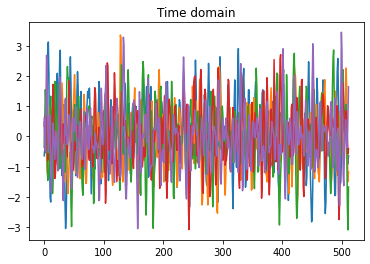

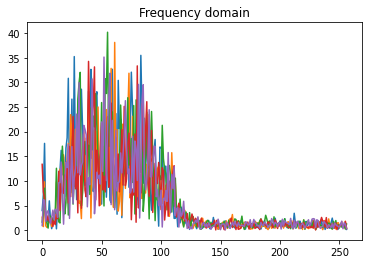

In [3]:
for i in range(5):
    plt.plot(data[i])
plt.title("Time domain")
plt.show()

for i in range(5):
    plt.plot(abs(fft.time2freq(data[i], 3.2*units.GHz)))
plt.title("Frequency domain")
plt.show()


# WGAN

In [4]:
# Create WGAN
wgan = WGAN(trace_length = len(data[0]))

2022-10-13 14:47:02.916362: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-13 14:47:02.916394: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-13 14:47:02.916417: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (wgs3e.zeuthen.desy.de): /proc/driver/nvidia/version does not exist
2022-10-13 14:47:02.916649: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 128, 32)          2304      
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, 128, 32)           3104      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 128, 32)           3104      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 128, 32)           0         
                                                                 
 conv1d_transpose (Conv1DTra  (None, 256, 16)          1552      
 nspose)                                                

# Training

In [10]:
# Train the WGAN
generator_loss, critic_loss = wgan.train(data, epochs=5, monitor=False)

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4


# Analyze results

Mean data: -1.4336996031661545e-17
Mean generated: -0.053102634847164154
Std data: 1.0000000000000002
Std generated: 0.9608647227287292
FFT MSE: 41.72927867617458


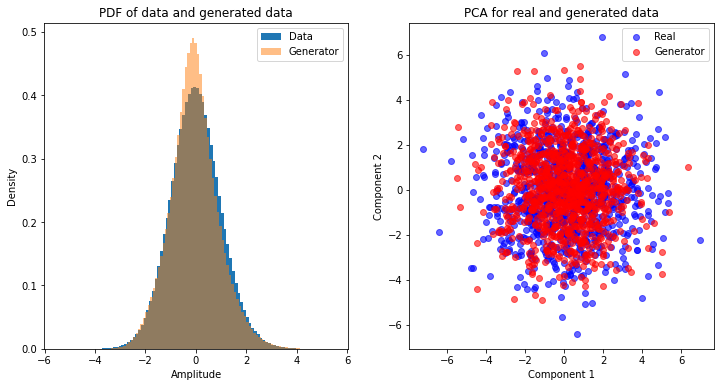

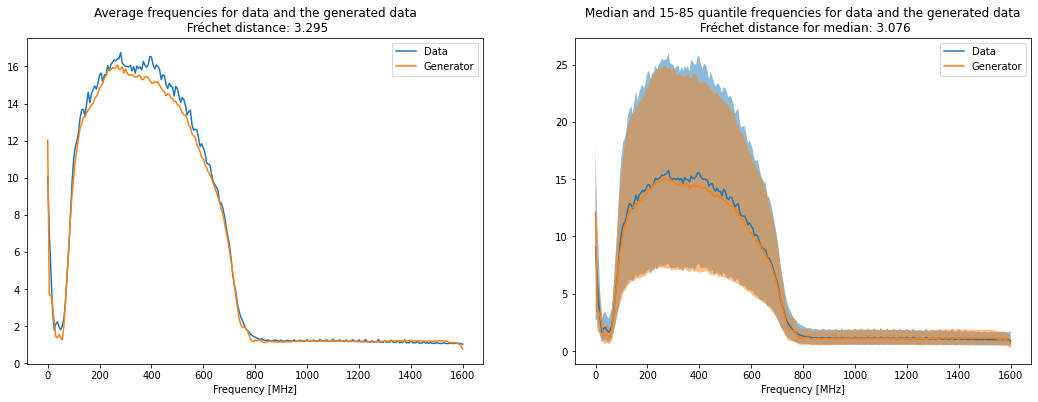

In [11]:
# Analyze the results
wgan.analyze_generator(data)

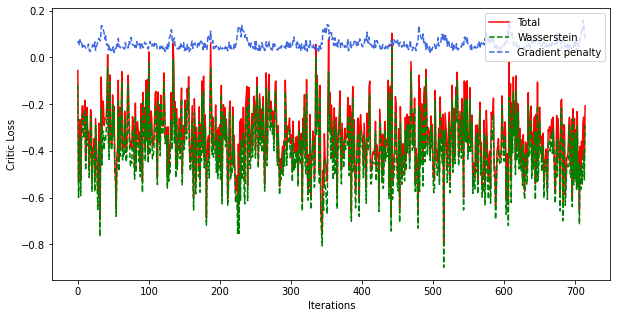

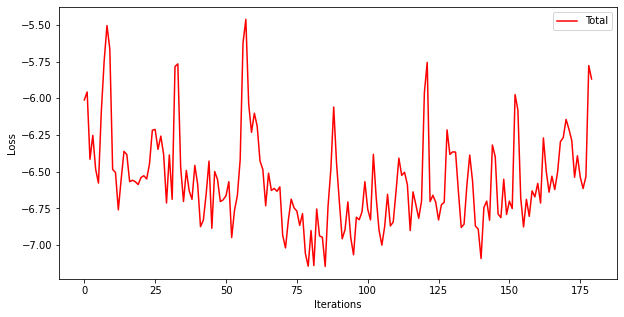

In [12]:
# Create arrays for generator and critic loss
wgan.plot_loss(generator_loss, critic_loss)

# Save model

In [ ]:
# wgan.generator.save("model")